In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
import numpy as np

# Load the data
df = pd.read_csv('New Dataframe.csv')

# Separate the features (X) and target (y)
X = df.drop(columns=['Target'])  # Replace 'Target' with the name of your target variable
y = df['Target']                 # Replace 'Target' with the name of your target variable

# Split data into training (65%), validation (20%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 * 0.35 ≈ 0.15

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict and evaluate on the validation and test sets
y_val_pred = dt_regressor.predict(X_val)
y_test_pred = dt_regressor.predict(X_test)

# Calculate metrics for validation set
val_r2 = r2_score(y_val, y_val_pred)
val_medAE = median_absolute_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Calculate metrics for test set
test_r2 = r2_score(y_test, y_test_pred)
test_medAE = median_absolute_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Additional statistics for validation predictions
val_stats = {
    "Validation Std Dev": np.std(y_val_pred),
    "Validation Avg": np.mean(y_val_pred),
    "Validation Min": np.min(y_val_pred),
    "Validation Max": np.max(y_val_pred),
}

# Additional statistics for test predictions
test_stats = {
    "Test Std Dev": np.std(y_test_pred),
    "Test Avg": np.mean(y_test_pred),
    "Test Min": np.min(y_test_pred),
    "Test Max": np.max(y_test_pred),
}

# Print validation metrics
print("Validation Set Metrics:")
print(f"R²: {val_r2:.2f}, MedAE: {val_medAE:.2f}, MAE: {val_mae:.2f}, RMSE: {val_rmse:.2f}")
print(f"Std Dev: {val_stats['Validation Std Dev']:.2f}, Avg: {val_stats['Validation Avg']:.2f}")
print(f"Min: {val_stats['Validation Min']:.2f}, Max: {val_stats['Validation Max']:.2f}\n")

# Print test metrics
print("Test Set Metrics:")
print(f"R²: {test_r2:.2f}, MedAE: {test_medAE:.2f}, MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}")
print(f"Std Dev: {test_stats['Test Std Dev']:.2f}, Avg: {test_stats['Test Avg']:.2f}")
print(f"Min: {test_stats['Test Min']:.2f}, Max: {test_stats['Test Max']:.2f}")

Validation Set Metrics:
R²: 0.65, MedAE: 0.00, MAE: 38.18, RMSE: 123.76
Std Dev: 213.59, Avg: 179.09
Min: 0.00, Max: 525.00

Test Set Metrics:
R²: 0.69, MedAE: 10.50, MAE: 44.63, RMSE: 122.30
Std Dev: 216.57, Avg: 239.51
Min: 0.00, Max: 517.00


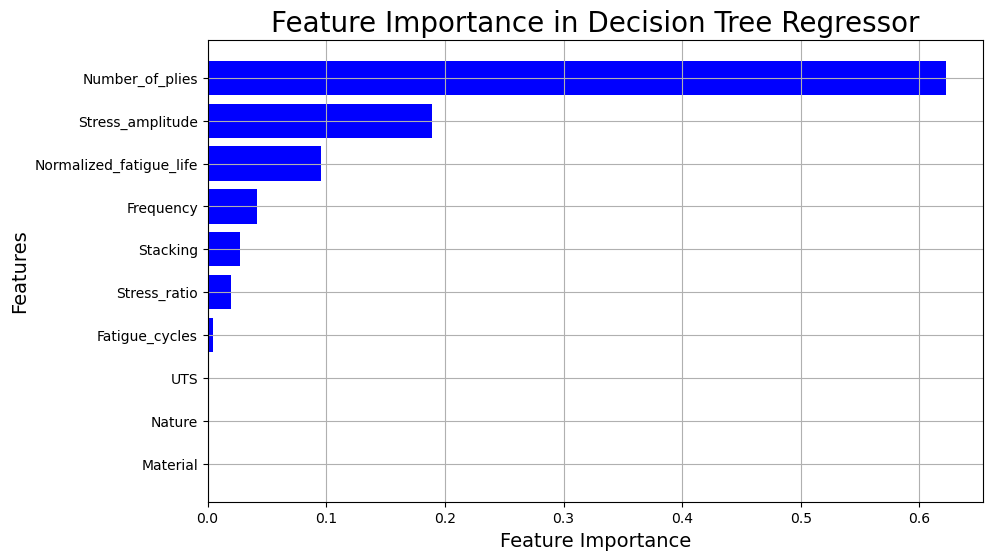

In [ ]:
# Plotting feature importance in ascending order
importances = dt_regressor.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance in Decision Tree Regressor', fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('Decison Tree.tiff', bbox_inches='tight', pad_inches=0.1)

plt.show()

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('New Dataframe.csv')

# Separate the features (X) and target (y)
X = df.drop(columns=['Target'])  # Replace 'Target' with the name of your target variable
y = df['Target']                 # Replace 'Target' with the name of your target variable

# Split data into training (65%), validation (20%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)  # 0.4286 * 0.35 ≈ 0.15

# Set up the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extract the best model
best_dt = grid_search.best_estimator_

# Predict and evaluate on the validation and test sets
y_val_pred = best_dt.predict(X_val)
y_test_pred_gs = best_dt.predict(X_test)

# Calculate metrics for validation set
val_r2 = r2_score(y_val, y_val_pred)
val_medAE = median_absolute_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Calculate metrics for test set
test_r2 = r2_score(y_test, y_test_pred_gs)
test_medAE = median_absolute_error(y_test, y_test_pred_gs)
test_mae = mean_absolute_error(y_test, y_test_pred_gs)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_gs))

# Additional statistics for validation predictions
val_stats = {
    'Validation Std Dev': np.std(y_val_pred),
    'Validation Avg': np.mean(y_val_pred),
    'Validation Min': np.min(y_val_pred),
    'Validation Max': np.max(y_val_pred),
}

# Additional statistics for test predictions
test_stats = {
    'Test Std Dev': np.std(y_test_pred_gs),
    'Test Avg': np.mean(y_test_pred_gs),
    'Test Min': np.min(y_test_pred_gs),
    'Test Max': np.max(y_test_pred_gs),
}

# Cross-validation R² score and best parameters
cv_r2 = grid_search.best_score_
best_params = grid_search.best_params_

# Print validation metrics
print("Validation Set Metrics:")
print(f"R²: {val_r2:.2f}, MedAE: {val_medAE:.2f}, MAE: {val_mae:.2f}, RMSE: {val_rmse:.2f}")
print(f"Std Dev: {val_stats['Validation Std Dev']:.2f}, Avg: {val_stats['Validation Avg']:.2f}")
print(f"Min: {val_stats['Validation Min']:.2f}, Max: {val_stats['Validation Max']:.2f}\n")

# Print test metrics
print("Test Set Metrics:")
print(f"R²: {test_r2:.2f}, MedAE: {test_medAE:.2f}, MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}")
print(f"Std Dev: {test_stats['Test Std Dev']:.2f}, Avg: {test_stats['Test Avg']:.2f}")
print(f"Min: {test_stats['Test Min']:.2f}, Max: {test_stats['Test Max']:.2f}\n")

# Print best parameters and cross-validation R²
print(f"Best Parameters: {best_params}")
print(f"Cross-Validation R²: {cv_r2:.2f}")

Validation Set Metrics:
R²: 0.65, MedAE: 0.00, MAE: 38.05, RMSE: 124.79
Std Dev: 214.48, Avg: 179.76
Min: 0.00, Max: 526.50

Test Set Metrics:
R²: 0.67, MedAE: 2.13, MAE: 49.41, RMSE: 126.45
Std Dev: 215.62, Avg: 238.01
Min: 0.00, Max: 510.67

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Cross-Validation R²: 0.94


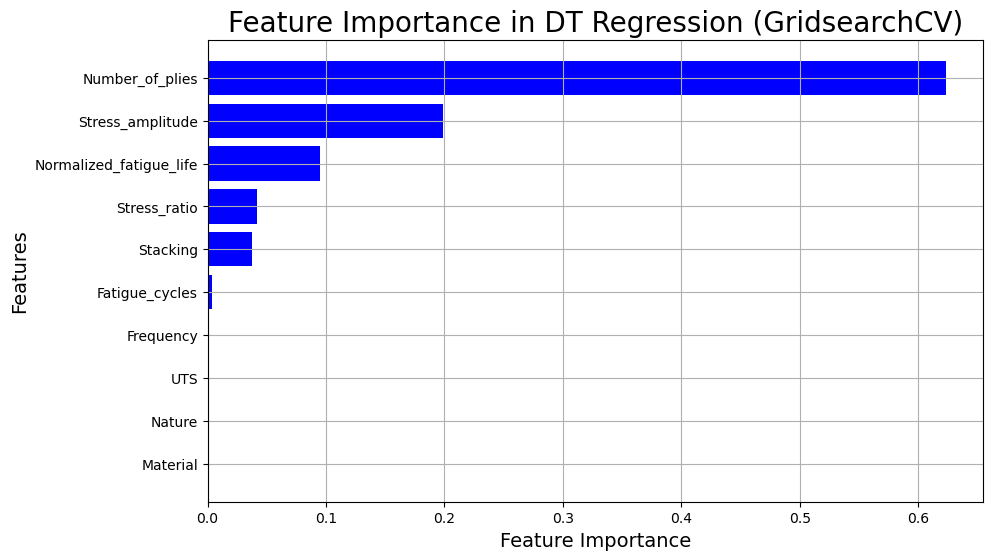

In [ ]:
# Feature Importance Plot in Ascending Order
importances = best_dt.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance in DT Regression (GridsearchCV)', fontsize=20)
plt.grid(True)

# Save the plot as an image
plt.savefig('DT GS.tiff', bbox_inches='tight', pad_inches=0.1)

plt.show()

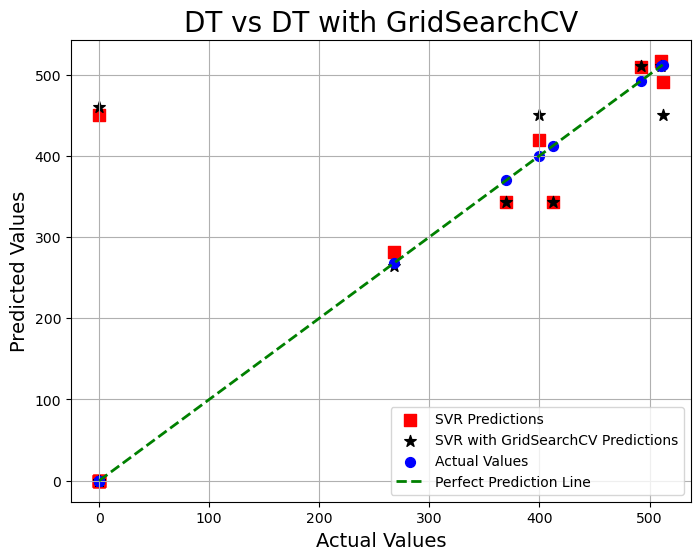

In [ ]:
# Generate Scatter Plot for ElasticNet vs GridSearchCV ElasticNet
plt.figure(figsize=(8, 6))

# Plot predictions from ElasticNet
plt.scatter(y_test, y_test_pred, marker='s', color='red', s=75, label="SVR Predictions")

# Plot predictions from GridSearchCV ElasticNet
plt.scatter(y_test, y_test_pred_gs, marker='*', color='black', s=75, label="SVR with GridSearchCV Predictions")

# Actual values (Round markers, green color)
plt.scatter(y_test, y_test, marker='o', color='blue', s=50, label="Actual Values")

# Reference line (Perfect prediction line y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Adding labels and legend
plt.title("DT vs DT with GridSearchCV", fontsize=20)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot as an image
plt.savefig('Decision Tree.tiff')

# Show plot
plt.show()